In [ ]:
from keras.datasets import mnist#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

3


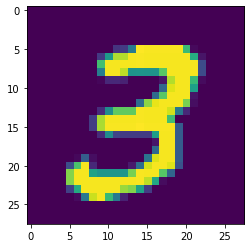

In [ ]:
#plot a few images to explore the samples

import matplotlib.pyplot as plt#plot the first image in the dataset
plt.imshow(X_train[7])
print(y_train[7])

In [ ]:
#the shape is again 28px*28px

X_train[0].shape

(28, 28)

Data pre-processing

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.


In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train.shape

(60000, 28, 28, 1)

We will one-hot encode our target variable in training and testing set(labels)

In [ ]:
from keras.utils import to_categorical#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 64 and 32 work well, so we will stick with this for now.

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix. Refer back to the introduction and the first image for a refresher on this.

Activation is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. This activation function has been proven to work well in neural networks.


Our first layer also takes in an input shape. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


Training the model

Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.




In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)

Epoch 1/8
1875/1875 [==============================] - 164s 87ms/step - loss: 0.2121 - accuracy: 0.9528 - val_loss: 0.0724 - val_accuracy: 0.9764
Epoch 2/8
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0828 - val_accuracy: 0.9775
Epoch 3/8
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0759 - val_accuracy: 0.9797
Epoch 4/8
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.1124 - val_accuracy: 0.9754
Epoch 5/8
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0983 - val_accuracy: 0.9772
Epoch 6/8
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.1092 - val_accuracy: 0.9798
Epoch 7/8
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.1296 -

In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[6.9584625e-19, 1.0544627e-24, 1.4317620e-15, 4.1769040e-13,
        4.6396871e-19, 2.2483785e-19, 9.1760504e-26, 1.0000000e+00,
        2.0486545e-13, 7.6189340e-14],
       [1.0478367e-12, 1.4086032e-14, 1.0000000e+00, 6.4747622e-16,
        6.8597080e-19, 1.3769485e-23, 1.0893702e-08, 1.2096095e-20,
        1.9204432e-14, 1.1586957e-19],
       [9.1086329e-13, 9.9992049e-01, 6.5791608e-09, 1.2956405e-19,
        8.3635916e-07, 2.3643563e-13, 6.8803475e-16, 1.0705247e-10,
        7.8653466e-05, 1.0127123e-13],
       [1.0000000e+00, 4.0131014e-23, 2.0831348e-18, 3.5376598e-16,
        9.8468608e-20, 3.3104152e-14, 7.5232189e-11, 2.4894616e-17,
        1.1245980e-12, 2.1961581e-10]], dtype=float32)

In [ ]:
for val in model.predict(X_test[:4]):
  print(np.argmax(val))

7
2
1
0


In [ ]:
#see the actual result to verify
y_test[::4]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.1323 - accuracy: 0.9780


[0.13227495551109314, 0.9779999852180481]

The accuracy is close to 98 percent
